# 다항회귀

## 다항식 특성으로 변환

In [4]:
# sampel [[0,1][2, 3]] 변환 연습

import numpy as np

In [22]:

X = np.array([2, 3])
X = X.reshape(-1, 2)
X

array([[2, 3]])

In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly.transform(X)

array([[1., 2., 3., 4., 6., 9.]])

In [24]:
print(poly.get_feature_names_out())

['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']


## 사이킷런으로 다항 회귀 분석

In [ ]:
#1) 데이터 준비: 데이터를 생성하여 탐색 및 확인

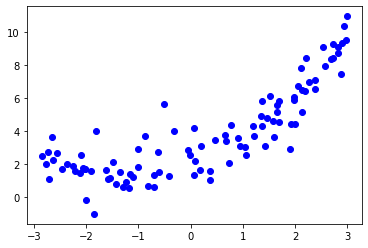

In [63]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(28)
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(100, 1)

plt.scatter(X, y, color='blue')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

xx = np.linspace(X.min()-0.1, X.max()+0.1).reshape(-1, 1)

In [ ]:
# 2) 단순 선형 회귀 분석 및 시각화 : 비교 목적

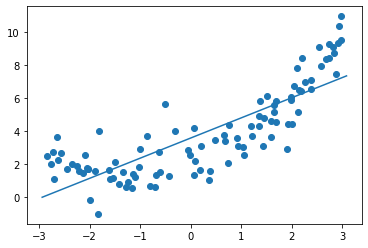

In [64]:
from sklearn.linear_model import LinearRegression

X1_train = X
y_train = y

reg1 = LinearRegression()
reg1.fit(X1_train, y_train)
xx = np.linspace(X.min()-0.1, X.max()+0.1).reshape(-1, 1)
yy = reg1.predict(xx)

plt.plot(xx, yy)
plt.scatter(X, y)

In [51]:
# 3) 2차항 형태로 다항 회귀 수행

In [67]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X2_train = poly.fit_transform(X)
y_train = y

In [68]:
X2_train

array([[ 1.00000000e+00,  1.37408245e+00,  1.88810259e+00],
       [ 1.00000000e+00,  3.67437614e-01,  1.35010400e-01],
       [ 1.00000000e+00, -2.25019745e+00,  5.06338855e+00],
       [ 1.00000000e+00, -6.14445788e-01,  3.77543626e-01],
       [ 1.00000000e+00,  1.68784924e+00,  2.84883505e+00],
       [ 1.00000000e+00,  6.59578899e-02,  4.35044324e-03],
       [ 1.00000000e+00, -1.90383985e+00,  3.62460617e+00],
       [ 1.00000000e+00,  2.12107725e+00,  4.49896871e+00],
       [ 1.00000000e+00,  2.73223136e+00,  7.46508818e+00],
       [ 1.00000000e+00,  2.90528081e+00,  8.44065658e+00],
       [ 1.00000000e+00, -1.84379416e+00,  3.39957689e+00],
       [ 1.00000000e+00,  2.82477061e+00,  7.97932899e+00],
       [ 1.00000000e+00, -1.59114987e+00,  2.53175792e+00],
       [ 1.00000000e+00, -2.84187691e+00,  8.07626437e+00],
       [ 1.00000000e+00,  2.67636206e+00,  7.16291387e+00],
       [ 1.00000000e+00,  2.53034911e+00,  6.40266663e+00],
       [ 1.00000000e+00, -1.23614539e+00

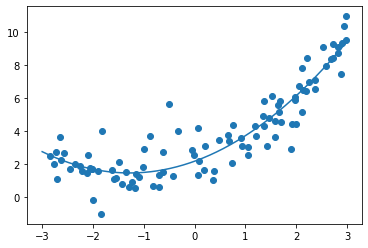

In [69]:
reg2 = LinearRegression()
reg2.fit(X2_train, y_train)
xx = np.arange(-3, 3, 0.01).reshape(-1, 1)
xx2 = poly.transform(xx)
yy = reg2.predict(xx2)

plt.scatter(X, y)
plt.plot(xx, yy)

In [70]:
# 구해진 2차식의 계수 확인
reg2.coef_, reg2.intercept_

(array([[0.        , 1.11284649, 0.43531499]]), array([2.17157426]))

In [71]:
# 4) 7차항 형태로 다항회귀 수행

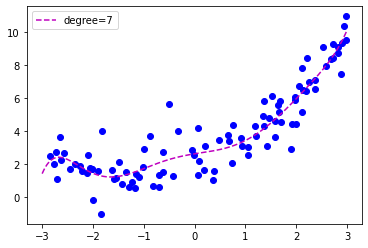

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=7)
X7_train = poly.fit_transform(X)
y_train = y

reg7 = LinearRegression().fit(X7_train, y_train)

xx = np.arange(-3, 3, 0.01).reshape(-1, 1)
xx7 = poly.transform(xx)
yy = reg7.predict(xx7)

plt.scatter(X, y, c='b')
plt.plot(xx, yy, c='m', linestyle='--', label='degree=7')
plt.legend()
plt.show()

In [ ]:
# 각 차수별 그래프와 원본 데이터 비교 시각화

# pipeline 응용

In [ ]:
# 데이터 변환과정과 머신러닝을 연결해줌

In [ ]:
# 1) degree=2인 모델
from sklearn.pipeline import make_pipeline

reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression()).fit(X, y)
xx = np.arange(-3, 3, 0.01)
yy = reg.predict(xx[:, np.newaxis])

plt.plot(xx, yy, color='r', linestyle='--', label='degree=2')
plt.scatter(X, y, color='b', alpha=0.2)
plt.legend()
plt.show()

In [ ]:
# 2) degree = [1, 3, 7]인 모델을 파이프라인으로 변환- 추정 통합

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree = [1, 3, 7]
colors = ['magenta', 'green', 'red']

plt.scatter(X, y, color='b', alpha=0.2)
for i, d in enumerate(degree): 
    reg = make_pipeline(PolynomialFeatures(degree=d), LinearRegression()).fit(X, y)
    xx = np.arange(-3, 3, 0.01)
    yy = reg.predict(xx[:, np.newaxis])

    plt.plot(xx, yy, color=colors[i], linestyle='--', label='degree={}'.format(d))
    plt.legend()
plt.show()  

In [ ]:
# 1, 2, 3, 7 나란히 그리기
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree = [1, 3, 7, 9]
colors = ['magenta', 'green', 'red', 'lime']


fig, ax = plt.subplots(2, 2, figsize=(16, 5))

for i, d in enumerate(degree): 
    #ax = fig.add_subplots(2, 2, i)
    
    reg = make_pipeline(PolynomialFeatures(degree=d), LinearRegression()).fit(X, y)
    xx = np.arange(-3, 3, 0.01)
    yy = reg.predict(xx[:, np.newaxis])
    ax[i].scatter(X, y, color='b', alpha=0.2)
    ax[i].plot(xx, yy, color=colors[i], linestyle='--', label='degree={}'.format(d))
    ax[i].legend()
plt.show()  

# pipeline 실습

In [ ]:
#################
##파이프라인 연습
####################
#다항식으로 데이터를 변환시키고 학습을 연결시키는 파이프라인 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
## 학습용, 검증용 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# 시각화를 위한 xx 좌표계 미리 준비
# y축 좌표계는 각 모델마다 만듦
#xx = np.linspace(X.min()-0.1, X.max()+0.1).reshape(-1, 1)
xx = np.arange(-3, 3, 0.01).reshape(-1, 1)
degree=[1, 3, 5, 10]

for d in degree:
    reg = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    yy = reg.predict(xx)
    r2 = r2_score(y_test, y_pred)
    plt.figure(figsize=(5,5))
    plt.plot(xx, yy, label='degree={}'.format(d))
    plt.scatter(X, y, s=5)
    plt.legend()
    
    # 주석 표시 - 텍스트
    plt.annotate('r2_score: {:.3f} '.format(r2),  #텍스트 입력
                 xycoords= 'axes pixels',
                 xy=(10, 230),            #텍스트 위치 기준점
                 )
    

# [실습 ]: 보스턴 집값 데이터셋을 활용한 다항회귀 실습 - 방의 갯수 VS 가격

### 필요한 모듈 import

In [ ]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

#### 데이터 수집

In [ ]:
boston = load_boston()

#### 데이터 이해

In [ ]:
#boston.DESCR
print(boston.feature_names)

#### 데이터 준비

In [ ]:
# 독립변수, 종속변수를 데이터프레임으로 정리

In [ ]:
boston.data

In [ ]:
np.set_printoptions(suppress=True)
boston.data[:5]

In [ ]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)['RM'].to_frame()
y = boston.target

In [ ]:
# 데이터프레임 확인
print(X)
print(X.values)

In [ ]:
# 학습용, 검증용 데이터 분할


#### 모델 구축

In [ ]:
# 시각화를 위한 xx 좌표계 미리 준비
# y축 좌표계는 각 모델마다 만듦
xx = np.linspace(X.min()-1, X.max()+1)  # 방의 갯수 최대값, 최소값

In [14]:
# 2차식의 다항회귀


In [15]:
# 3차식의 다항회귀


####  다항 회귀 시각화

#### 모델 성능 평가

In [16]:
# 차수에 따른 r2(결정계수)를 시리즈로 만들어보자


#  당뇨병 데이터로 다항 회귀 실습

- hint:
- 1) 데이터셋:load_diabetes
- 2) 체질량지수(bmi)를 가지고 단순 선형회귀, 2차, 3차 다항회귀를 수행하고, 가장 적합한 모델을 찾으시오
- 3) 데이터 분할 비율: 0.3, random_state=1
- 4) 차수별 시각화
- 5) 차수별 결정계수 비교

In [17]:
# 1) 데이터프레임으로 만들기


In [ ]:
# 선형 모델 객체 생성


In [ ]:
# 시각화를 위한 xx 좌표축 범위 확정



In [18]:
# 차수별 모형 구축



In [ ]:
# 차수별 시각화

In [ ]:
# 차수에 따른 r2(결정계수)를 시리즈로 만들어보자


# 농어의 길이, 두께, 넓이 데이터를 활용하여 농어의 무게를 예측하는 선형회귀식을 완성하라


* 1) 데이터셋: 입력변수(perch_full.csv), 종속변수(perch_weight)
* 2) 단순선형회귀, 2차 다항회귀, 3차 다항회귀를 각각 수행하고, 가장 r2가 높은 모델을 찾으시오
* 3) 데이터 분할 비율: 0.2, random_state=22

In [ ]:
import pandas as pd
df = pd.read_csv('./data/perch_full.csv')
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
# X, y 데이터셋 준비

In [ ]:
#데이터 분할

In [ ]:
# 단순 선형회귀

In [ ]:
#2차 다항회귀

In [ ]:
# 2차 다항회귀를 파이프라인으로 구현

# 3차 다항회귀

# 5차 다항회귀

In [ ]:
# 5차 다항회귀 Pipeline with make_pipeline
from sklearn.pipeline import make_pipeline
reg5_mp = make_pipeline(PolynomialFeatures(degree=5), \
                      LinearRegression())
reg5_mp.fit(X_train, y_train)
y_pred5_mp = reg5_mp.predict(X_test)
print(reg5_mp[1].coef_, reg5_mp[1].intercept_)
r2_score(y_test, y_pred5_mp)
8:35
# 5차 다항회귀 with Pipeline
from sklearn.pipeline import Pipeline
reg5_p = Pipeline([('poly', PolynomialFeatures()), \
                    ('lr', LinearRegression())])
# parameter 설정, ('poly', PolynomialFeatures(degree=5)와 동일
reg5_p.set_params(poly__degree=5)
8:35
reg5_p.fit(X_train, y_train)
y_pred5_p = reg5_p.predict(X_test)
#print(reg5.coef_, reg5.intercept_)
r2_score(y_test, y_pred5_p)

############## 여기까지 ##############